In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

#### -->imported libraries

In [2]:
train=pd.read_csv('train-data.csv')
test=pd.read_csv('test-data.csv')

#### --> Loaded dataset

In [3]:
print(train.shape)
print(test.shape)

(6019, 14)
(1234, 13)


In [4]:

train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


## Explore Data

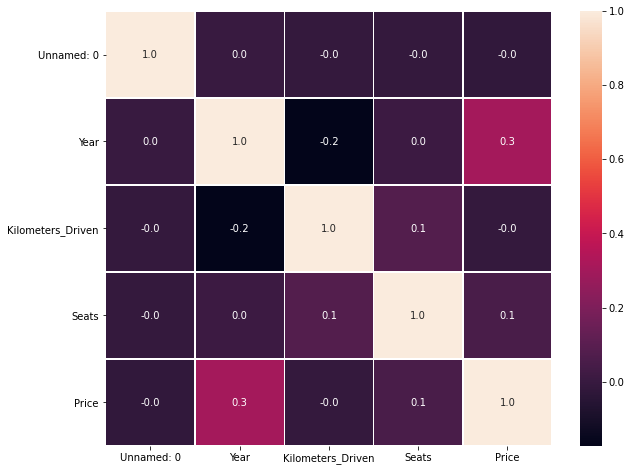

In [6]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Text(0.5, 1.0, 'Year')

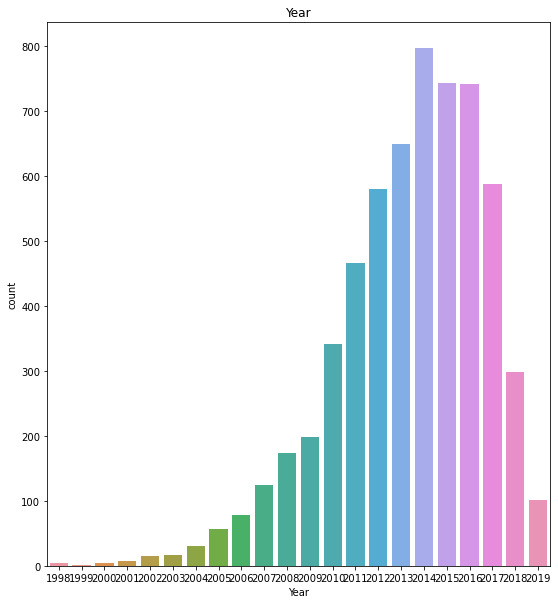

In [7]:
sns.countplot(train['Year'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Year')

#### --> most used cars are from year 2014 

Text(0.5, 1.0, 'Location')

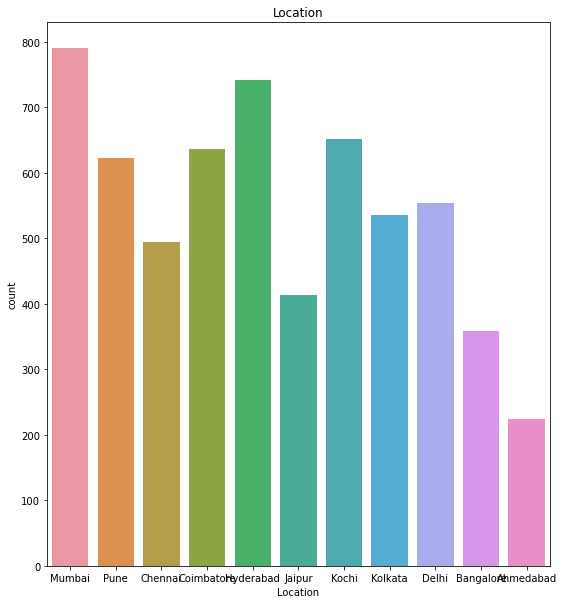

In [8]:
sns.countplot(train['Location'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Location')

#### --> more used cars are from Mumbai location

Text(0.5, 1.0, 'Fuel_Type')

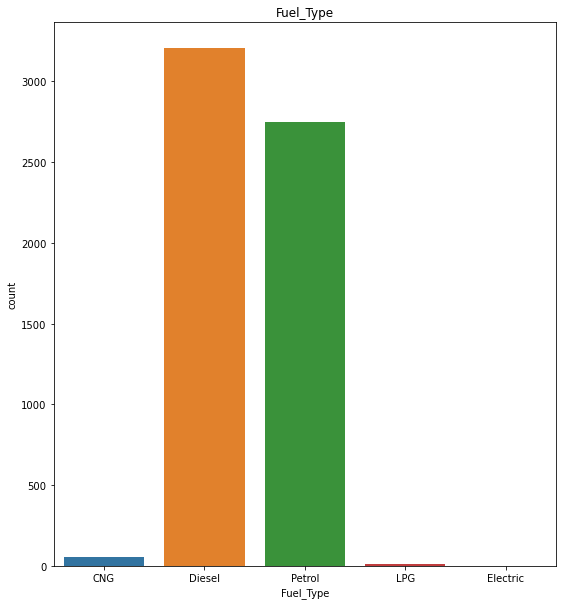

In [9]:
sns.countplot(train['Fuel_Type'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Fuel_Type')

#### --> most of the cars are diesel Fuel type

Text(0.5, 1.0, 'Transmission')

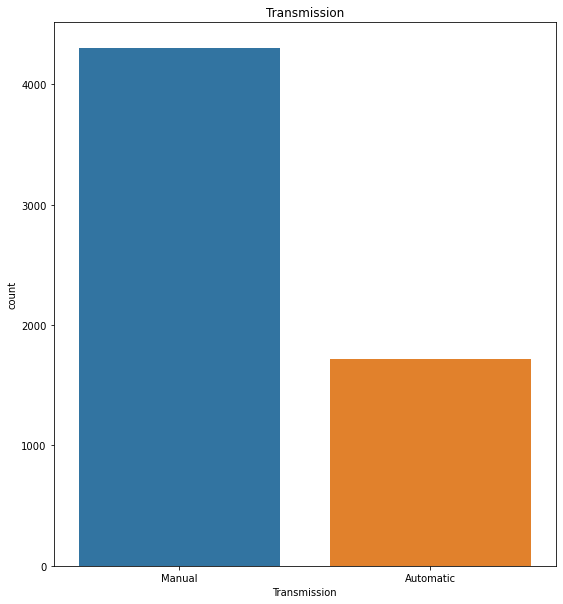

In [10]:
sns.countplot(train['Transmission'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Transmission')

#### ---> most of the cars are Manual in Transmission

Text(0.5, 1.0, 'Owner_Type')

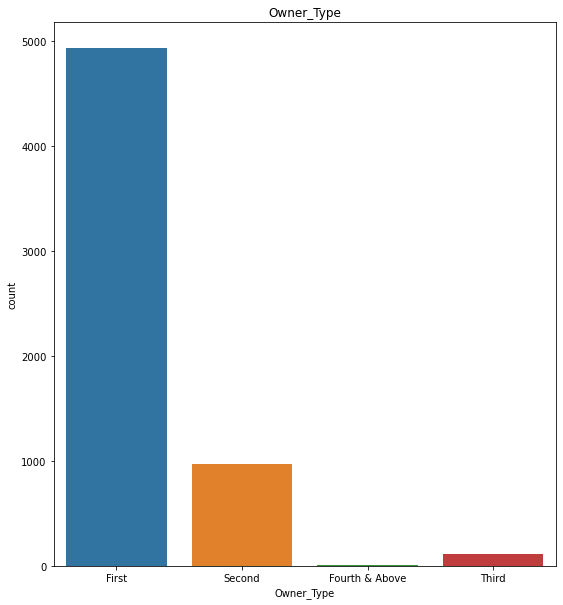

In [11]:
sns.countplot(train['Owner_Type'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Owner_Type')

#### --> cars are mostly from first Owner Type

Text(0.5, 1.0, 'Seats')

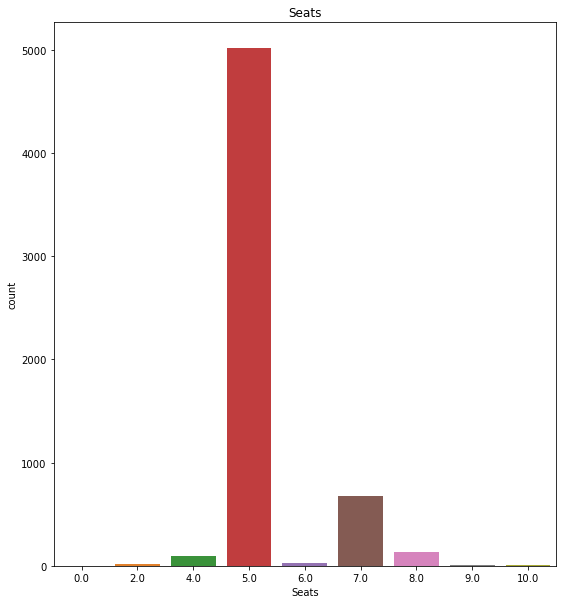

In [12]:
sns.countplot(train['Seats'])
fig = plt.gcf()
fig.set_size_inches(9,10)
plt.title('Seats')

#### --->most of the cars have 5  seats

Text(0.5, 1.0, 'Name')

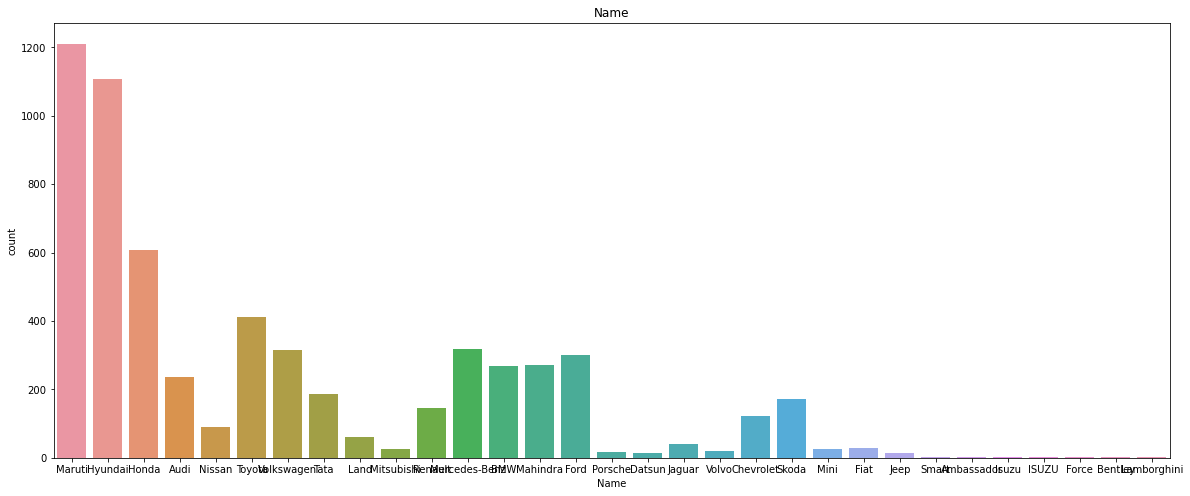

In [13]:
 
sns.countplot(train['Name'].apply(lambda x: str(x).split(" ")[0]))
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.title('Name')

#### --> most of the cars are from maruti company

In [14]:
sh_train = train.shape[0]
sh_test = test.shape[0]

#### --> saving the shape of train and test

In [15]:
y_ = train.Price.values

In [16]:
train_ = train.drop(['Price'], axis=1)
test_ = test


In [17]:
print(train_.shape,test_.shape)

(6019, 13) (1234, 13)


In [18]:
combined_data = pd.concat([train_, test_]).reset_index(drop=True)
print('Features size:', combined_data.shape)


Features size: (7253, 13)


#### ---> combined train and test data 

In [19]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 736.8+ KB


#### ---->new price column has more missing values

In [20]:
combined_data.drop(combined_data.columns[[0,12]], axis=1, inplace=True)

#### --->dropped Unnamed and new price column

In [21]:
combined_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0


In [22]:
combined_data['Company_name']=combined_data['Name'].apply(lambda x: str(x).split(" ")[0])
combined_data.drop(['Name'],axis=1,inplace=True)
combined_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Audi


#### --->Extracted Company name and dropped name column

In [23]:
combined_data['Mileage']=combined_data.Mileage.str.extract('(\d*\.\d+|\d+)')
combined_data['Mileage']=combined_data['Mileage'].astype(float)
combined_data['Mileage']=combined_data.Mileage.round()
combined_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name
0,Mumbai,2010,72000,CNG,Manual,First,27.0,998 CC,58.16 bhp,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,20.0,1582 CC,126.2 bhp,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199 CC,88.7 bhp,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,21.0,1248 CC,88.76 bhp,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968 CC,140.8 bhp,5.0,Audi


#### -->mileage column converted from object to float

In [24]:
combined_data['Engine']=combined_data.Engine.str.extract('(\d*)')
combined_data['Engine']=combined_data['Engine'].astype(float)
combined_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name
0,Mumbai,2010,72000,CNG,Manual,First,27.0,998.0,58.16 bhp,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,20.0,1582.0,126.2 bhp,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.7 bhp,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,21.0,1248.0,88.76 bhp,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.8 bhp,5.0,Audi


#### --->engine column converted from object to float

In [25]:
combined_data['Power']=combined_data.Power.str.extract('(\d*\.\d+|\d+)')
combined_data['Power']=combined_data['Power'].astype(float)
combined_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name
0,Mumbai,2010,72000,CNG,Manual,First,27.0,998.0,58.16,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,20.0,1582.0,126.20,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.70,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,21.0,1248.0,88.76,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.80,5.0,Audi


#### --> Power column is converted from  object to float

In [26]:
combined_data['how_old']=2020-combined_data['Year']
combined_data.drop(['Year'],axis=1,inplace=True)
combined_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
0,Mumbai,72000,CNG,Manual,First,27.0,998.0,58.16,5.0,Maruti,10
1,Pune,41000,Diesel,Manual,First,20.0,1582.0,126.20,5.0,Hyundai,5
2,Chennai,46000,Petrol,Manual,First,18.0,1199.0,88.70,5.0,Honda,9
3,Chennai,87000,Diesel,Manual,First,21.0,1248.0,88.76,7.0,Maruti,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.0,1968.0,140.80,5.0,Audi,7


#### --->Using Year column we calculated the how_old of the car

In [27]:
#Extracting missing columns
nan=combined_data.isna().sum()
na=pd.DataFrame([np.array(combined_data.columns),np.array(nan)]).T
na.columns=['columns','nan_sum']
nan_columns=na[na['nan_sum']!=0]['columns'].to_numpy()
nan_columns

array(['Mileage', 'Engine', 'Power', 'Seats'], dtype=object)

#### ---> columns containing the missed values

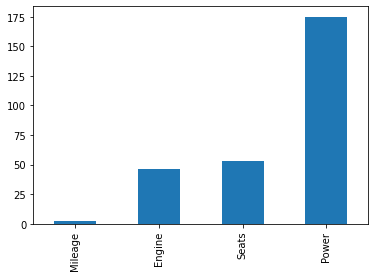

In [28]:

#plotting missing values
missing = nan
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()



In [29]:
print(combined_data[nan_columns])
print(combined_data[nan_columns].info())

      Mileage  Engine   Power  Seats
0        27.0   998.0   58.16    5.0
1        20.0  1582.0  126.20    5.0
2        18.0  1199.0   88.70    5.0
3        21.0  1248.0   88.76    7.0
4        15.0  1968.0  140.80    5.0
...       ...     ...     ...    ...
7248     21.0  1598.0  103.60    5.0
7249     17.0  1197.0  103.60    5.0
7250     23.0  1461.0   63.10    5.0
7251     17.0  1197.0  103.60    5.0
7252     10.0  2148.0  170.00    5.0

[7253 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  7251 non-null   float64
 1   Engine   7207 non-null   float64
 2   Power    7078 non-null   float64
 3   Seats    7200 non-null   float64
dtypes: float64(4)
memory usage: 226.8 KB
None


In [30]:
categorical_nan=combined_data[nan_columns].select_dtypes(include=['object']).columns
categorical_nan

Index([], dtype='object')

In [31]:
numerical_nan=combined_data[nan_columns].select_dtypes(include=['int64','float64']).columns
numerical_nan

Index(['Mileage', 'Engine', 'Power', 'Seats'], dtype='object')

### Handling missing values


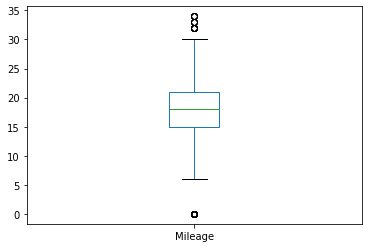

In [32]:

(combined_data['Mileage'].plot.box()) 

In [33]:
combined_data['Mileage'].fillna(value=combined_data['Mileage'].mean(),inplace=True)

#### -->filled Mileage column with mean 

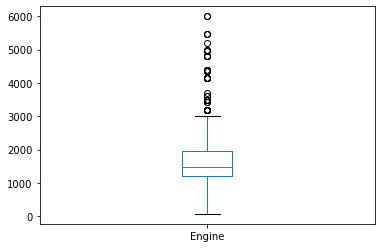

In [34]:
(combined_data['Engine'].plot.box()) 

In [35]:
combined_data['Engine'].fillna(value=combined_data['Engine'].median(),inplace=True)

#### ---> filled Engine column with median

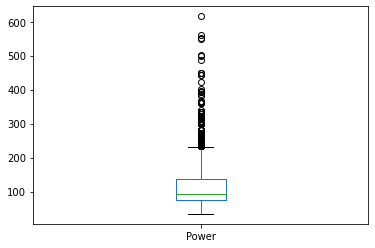

In [36]:
(combined_data['Power'].plot.box()) 

In [37]:
combined_data['Power'].fillna(value=combined_data['Power'].median(),inplace=True)

#### --> filled power column with median

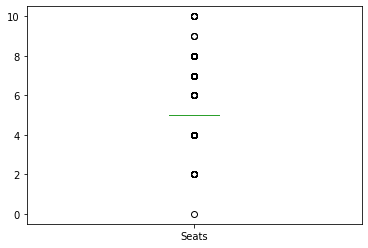

In [38]:
(combined_data['Seats'].plot.box()) 

In [39]:
combined_data['Seats'].fillna(value=combined_data['Seats'].median(),inplace=True)

#### --> filled seats column with median

In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Kilometers_Driven  7253 non-null   int64  
 2   Fuel_Type          7253 non-null   object 
 3   Transmission       7253 non-null   object 
 4   Owner_Type         7253 non-null   object 
 5   Mileage            7253 non-null   float64
 6   Engine             7253 non-null   float64
 7   Power              7253 non-null   float64
 8   Seats              7253 non-null   float64
 9   Company_name       7253 non-null   object 
 10  how_old            7253 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 623.4+ KB


In [41]:
combined_data['Mileage']=combined_data['Mileage'].astype(int)
combined_data['Engine']=combined_data['Engine'].astype(int)
combined_data['Power']=combined_data['Power'].astype(int)
combined_data['Seats']=combined_data['Seats'].astype(int)

#### converted Mileage,Engine,Power,Sests to integer type

In [42]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           7253 non-null   object
 1   Kilometers_Driven  7253 non-null   int64 
 2   Fuel_Type          7253 non-null   object
 3   Transmission       7253 non-null   object
 4   Owner_Type         7253 non-null   object
 5   Mileage            7253 non-null   int32 
 6   Engine             7253 non-null   int32 
 7   Power              7253 non-null   int32 
 8   Seats              7253 non-null   int32 
 9   Company_name       7253 non-null   object
 10  how_old            7253 non-null   int64 
dtypes: int32(4), int64(2), object(5)
memory usage: 510.1+ KB


### Explore data

In [43]:
from wordcloud import WordCloud

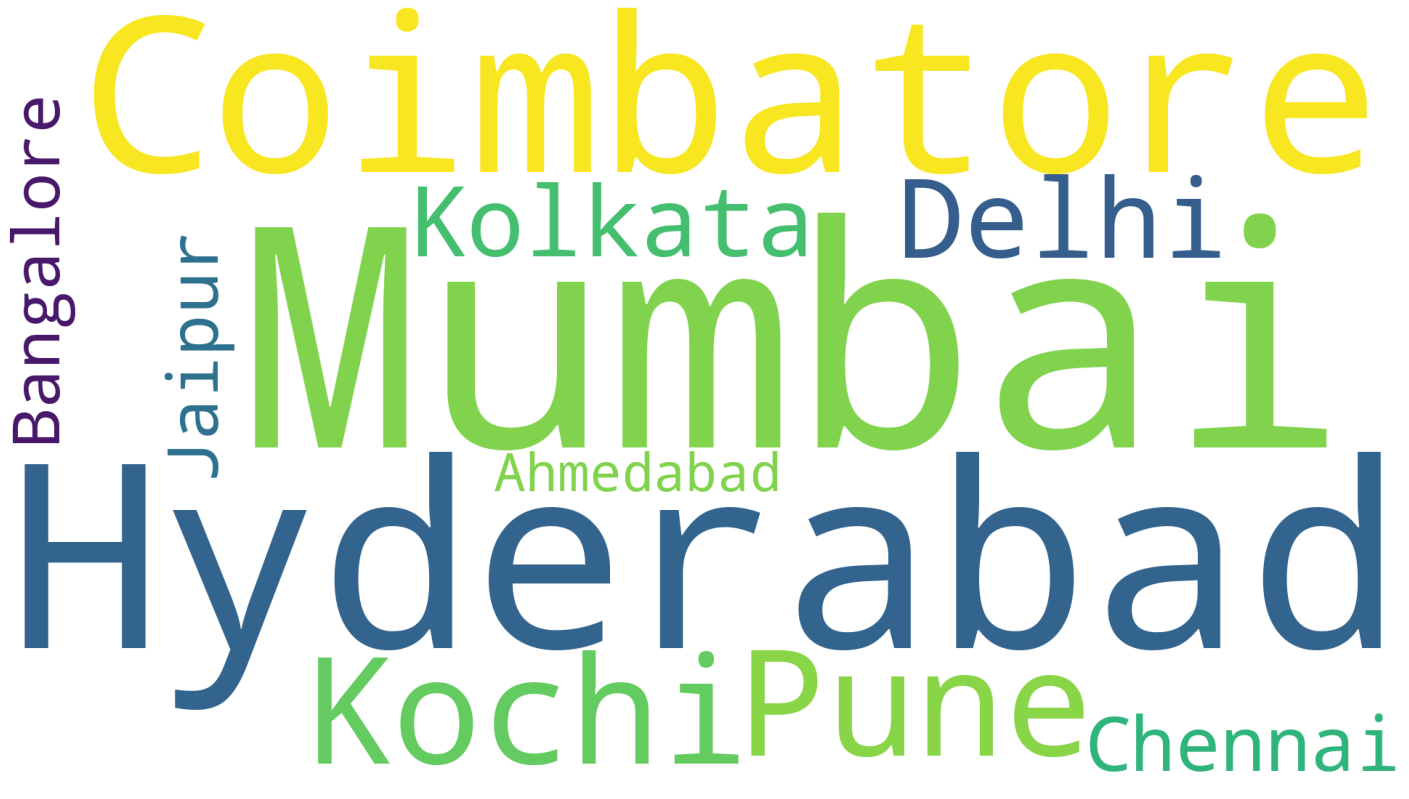

In [44]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate("  ".join(combined_data.Location))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### --->Mumbai location has more number of used cars

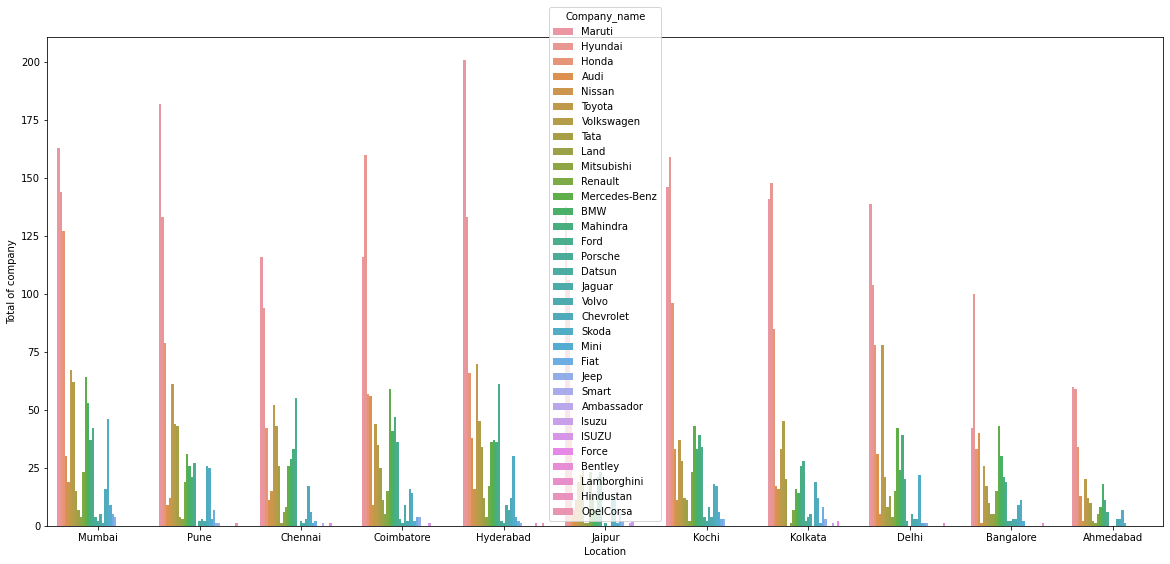

In [45]:
plt.figure(figsize=(20,9))    # Arrange figure size
sns.countplot('Location',hue = 'Company_name' ,data = combined_data)  # Show the counts of observations in each categorical bin using bars.
plt.ylabel('Total of company')  # Y-axis
plt.show()

#### ---> mostly we have the maruti cars in every location

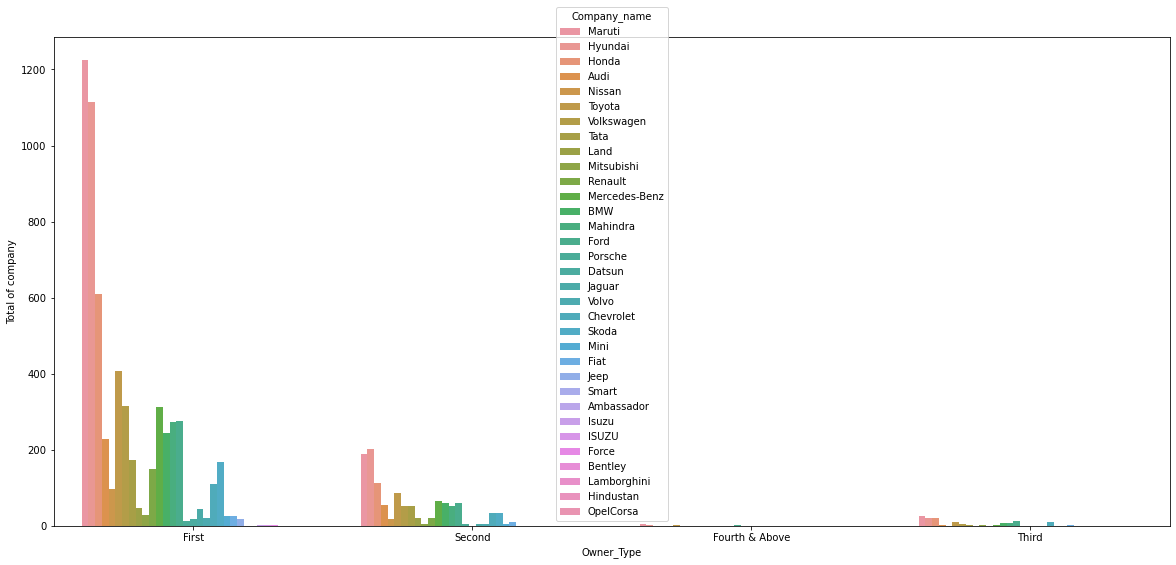

In [46]:
plt.figure(figsize=(20,9))    # Arrange figure size
sns.countplot('Owner_Type',hue = 'Company_name' ,data = combined_data)  # Show the counts of observations in each categorical bin using bars.
plt.ylabel('Total of company')  # Y-axis
plt.show()

#### ---> mostly we have the maruti cars as first  owner type

In [47]:
combined_data.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Company_name',
       'how_old'],
      dtype='object')

### Max Kilometers driven car 

In [48]:
combined_data[combined_data['Kilometers_Driven']==combined_data.Kilometers_Driven.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
2328,Chennai,6500000,Diesel,Automatic,First,16,2993,258,5,BMW,3


### min Kilometers driven car 

In [49]:
combined_data[combined_data['Kilometers_Driven']==combined_data.Kilometers_Driven.min()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
1361,Mumbai,171,Petrol,Manual,First,25,796,47,5,Maruti,1


### Max Mileage car

In [50]:
combined_data[combined_data['Mileage']==combined_data.Mileage.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
1332,Pune,79494,CNG,Manual,First,34,998,67,5,Maruti,7
2059,Mumbai,54000,CNG,Manual,First,34,998,67,5,Maruti,7
2371,Pune,29202,CNG,Manual,First,34,998,67,5,Maruti,6
3129,Delhi,74663,CNG,Manual,First,34,998,67,5,Maruti,6
4141,Mumbai,47200,CNG,Manual,First,34,998,67,5,Maruti,6


### High Capacity engine car

In [51]:
combined_data[combined_data['Engine']==combined_data.Engine.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
5521,Hyderabad,48000,Petrol,Automatic,First,9,5998,552,4,Bentley,14
6354,Bangalore,31200,Petrol,Automatic,Second,10,5998,616,5,Bentley,12


### High powered Car

In [52]:
combined_data[combined_data['Power']==combined_data.Power.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
6354,Bangalore,31200,Petrol,Automatic,Second,10,5998,616,5,Bentley,12


### Max Seats Cars

In [53]:
combined_data[combined_data['Seats']==combined_data.Seats.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
814,Pune,77757,Diesel,Manual,Second,13,2446,75,10,Toyota,16
917,Mumbai,20000,Diesel,Manual,First,14,1978,83,10,Tata,7
1907,Bangalore,63000,Diesel,Manual,Third,13,2446,75,10,Toyota,18
2267,Pune,215750,Diesel,Manual,Second,0,2446,94,10,Toyota,16
2575,Hyderabad,120000,Diesel,Manual,First,15,2499,80,10,Chevrolet,5
6242,Chennai,196000,Diesel,Manual,Second,12,1948,68,10,Tata,5
6288,Hyderabad,150000,Diesel,Manual,Second,15,2499,80,10,Chevrolet,15
6875,Pune,119613,Diesel,Manual,Second,13,2446,75,10,Toyota,18


### Oldest  used Car

In [54]:
combined_data[combined_data['how_old']==combined_data.how_old.max()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
6216,Pune,65000,Diesel,Manual,Second,14,1995,94,5,Hindustan,24


### New used Cars

In [55]:
combined_data[combined_data['how_old']==combined_data.how_old.min()][combined_data.columns]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old
67,Coimbatore,15369,Diesel,Automatic,First,0,1950,194,5,Mercedes-Benz,1
135,Kochi,12645,Petrol,Automatic,First,17,1591,121,5,Hyundai,1
155,Kochi,14322,Petrol,Manual,First,21,814,55,5,Hyundai,1
173,Kolkata,1000,Petrol,Manual,First,19,1197,81,5,Hyundai,1
235,Kochi,14165,Diesel,Automatic,First,11,2755,171,7,Toyota,1
...,...,...,...,...,...,...,...,...,...,...,...
6884,Kochi,17431,Petrol,Manual,First,22,1197,81,5,Maruti,1
6957,Kochi,11574,Petrol,Manual,First,0,1199,88,5,Honda,1
6961,Kochi,17964,Diesel,Manual,First,23,1396,88,5,Hyundai,1
6982,Coimbatore,56371,Diesel,Manual,First,24,1186,73,5,Hyundai,1


In [56]:
combined_data.Mileage.min()

0

In [57]:
combined_data.Mileage.mode()

0    19
dtype: int32

In [58]:
combined_data[combined_data['Mileage']==0]=19


####  --->mileage with 0 value has no meaning so replacing with mode

In [59]:
combined_data['Seats'].min()

0

In [60]:
combined_data.Seats.mode()

0    5
dtype: int32

In [61]:
combined_data[combined_data['Seats']==0]=5

#### --> Seats with 0 value has no meaning so replaced with mode

In [62]:
combined_data['Price']=pd.DataFrame(y_)

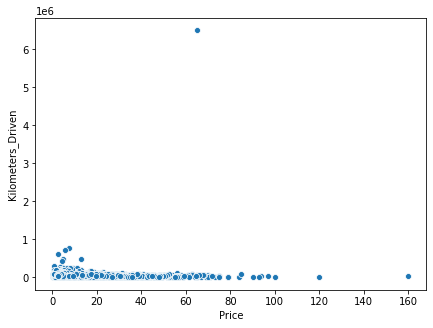

In [63]:
fig = plt.figure(figsize=(7,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
sns.scatterplot(x='Price', y='Kilometers_Driven', data=combined_data)
plt.show()

In [64]:
combined_data[combined_data['Kilometers_Driven'] >= 6000000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company_name,how_old,Price
2328,Chennai,6500000,Diesel,Automatic,First,16,2993,258,5,BMW,3,65.0


In [65]:
combined_data.drop(combined_data[combined_data['Kilometers_Driven'] >= 6000000].index, axis=0, inplace=True)

#### ---> dropped rows that are outliers in kilometers driven column

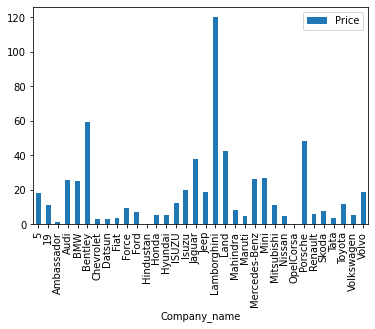

In [66]:
pd.DataFrame(combined_data.groupby('Company_name')['Price'].mean()).plot.bar()
plt.show()

#### ---.>Lamborghini is high priced  car

In [67]:
combined_data.drop(['Location'],axis=1,inplace=True)

#### ---> dropped Location column as it does not affect the price

In [68]:
combined_data = pd.get_dummies(combined_data, drop_first=True)

#### ---> done onehotencoding for the data

In [69]:
trainn = combined_data.iloc[:sh_train-1, :]
testt = combined_data.iloc[sh_train-1:, :]


#### ---> extracted the train and test from combined data


In [70]:


train_X = trainn.drop(['Price'], axis=1)
train_y = pd.DataFrame(trainn.Price.values)


#### ---> X independent Variable X and dependent variable y are ready

In [71]:
train_y.isna().sum()

0    0
dtype: int64

## Using Multiple Linear Regresssion

In [72]:
# fitting train data to the regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42)
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ----> model is ready and trained with training set

In [73]:
# making predictions
y_pred = regressor.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=np.array(y_pred).reshape(-1)
pred_real['y_test']=np.array(y_test).reshape(-1)
pred_real.head()

,y_pred,y_test
0,4.867982,5.75
1,7.027573,5.75
2,9.091410,8.00
3,-2.470615,5.90
4,4.604518,3.81


In [74]:
regressor.score(X_test,y_test)

0.72710412167697

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Multiple Linear regression gives R2 score",r2_score(y_pred,y_test))
print('Multiple Linear regression gives MSE is:',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Multiple Linear regression gives RMSE is:',rmse)
print("-------------------------------------------")

Multiple Linear regression gives R2 score 0.6311578376237479
Multiple Linear regression gives MSE is: 36.17347681250847
Multiple Linear regression gives RMSE is: 6.014439027250045
-------------------------------------------


## Using Random Forest 

In [76]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

#### ----> model is ready and trained with training set

In [77]:
# making predictions
y_pred = regressor.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_pred
pred_real['y_test']=np.array(y_test).reshape(-1)
pred_real.head()

,y_pred,y_test
0,5.519,5.75
1,6.720,5.75
2,7.584,8.00
3,4.945,5.90
4,4.462,3.81


In [78]:
regressor.score(X_test,y_test)

0.8355048894084132

In [79]:
print("Random Forest Regression gives R2 score",r2_score(y_pred,y_test))
print('Random Forest Regression gives MSE is:',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Random Forest Regression gives RMSE is:',rmse)
print("-------------------------------------------")

Random Forest Regression gives R2 score 0.8053258010332469
Random Forest Regression gives MSE is: 21.804506925210035
Random Forest Regression gives RMSE is: 4.66952962569144
-------------------------------------------


In [80]:
testt.drop(['Price'],axis=1,inplace=True)

In [81]:
pd.DataFrame(regressor.predict(testt)).head()

,0
0,3.176
1,2.588
2,18.240
3,3.910
4,4.407


#### ---> done predictions on given test data